# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('geo_comment.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70382 entries, 0 to 70381
Data columns (total 5 columns):
x                70382 non-null float64
y                70382 non-null float64
comment_class    70382 non-null int64
multiplier       70382 non-null int64
comment          70382 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 3.2+ MB


In [4]:
df.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [5]:
# уберем дупликаты
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11699 entries, 0 to 70381
Data columns (total 5 columns):
x                11699 non-null float64
y                11699 non-null float64
comment_class    11699 non-null int64
multiplier       11699 non-null int64
comment          11699 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 548.4+ KB


In [7]:
# координаты нулевого километра Москвы
zero_kilom_y = 55.75578
zero_kilom_x = 37.61786
# перевод 1 гр. широты и долготы в км
y_scale = (2*np.pi*6370)/360
x_scale = np.cos(np.deg2rad(zero_kilom_y))*y_scale

In [8]:
# создадим два признака с координатами x и y в км с началом координат на нулевом км.
# тогда по осям x и y будут одинаковые масштабы.
df['x_km'] = (df['x'] - zero_kilom_x)*x_scale
df['y_km'] = (df['y'] - zero_kilom_y)*y_scale

In [9]:
df.head()

,x,y,comment_class,multiplier,comment,x_km,y_km
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...,-0.340587,2.409661
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...,-0.340587,2.409661
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...,-0.911027,-1.520018
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...,-3.712051,-3.004238
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...,-3.217499,-2.666703


In [10]:
X = df[['x_km', 'y_km', 'comment_class']]

In [11]:
X.head()

,x_km,y_km,comment_class
0,-0.340587,2.409661,-1
1,-0.340587,2.409661,-1
2,-0.911027,-1.520018,-1
3,-3.712051,-3.004238,-1
4,-3.217499,-2.666703,-1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

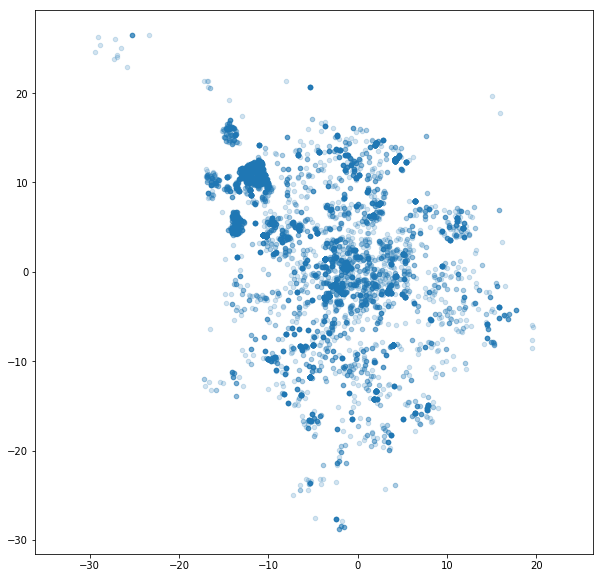

In [13]:
# Посмотрим на расположение и кучность голосов безотносительно голосов.
fig = plt.figure(figsize=(10,10))
ax = plt.scatter(x=X['x_km'], y=X['y_km'], s=20, alpha=0.2)
_ = plt.axis('equal')

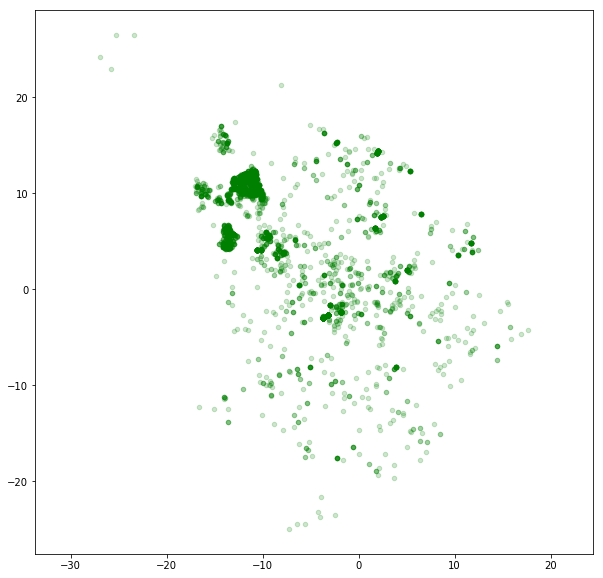

In [14]:
# Посмотрим на расположение и кучность голосов 'за'.
fig = plt.figure(figsize=(10,10))
ax = plt.scatter(x=X[X['comment_class']==1]['x_km'], y=X[X['comment_class']==1]['y_km'], s=20, alpha=0.2, c='g')
_ = plt.axis('equal')

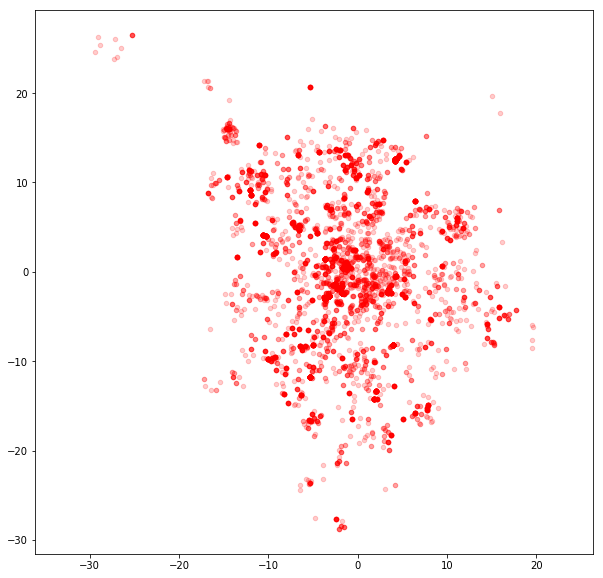

In [15]:
# Посмотрим на расположение и кучность голосов 'против'.
fig = plt.figure(figsize=(10,10))
ax = plt.scatter(x=X[X['comment_class']==-1]['x_km'], y=X[X['comment_class']==-1]['y_km'], s=20, alpha=0.2, c='r')
_ = plt.axis('equal')

Как, видно, голоса 'против' расположены гораздо равномерней. В то время как голоса 'за' сильно разрежены и лишь в некоторых районах имеют очень высокую плотность.

In [16]:
from sklearn.cluster import KMeans

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [17]:
# подберем оптимальное количество кластеров для KMeans
np.random.seed(1)
k_inertia = []
ks = range(1,51)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    clusters_kmeans = clf_kmeans.fit_predict(X[['x_km', 'y_km']])
    k_inertia.append(clf_kmeans.inertia_)

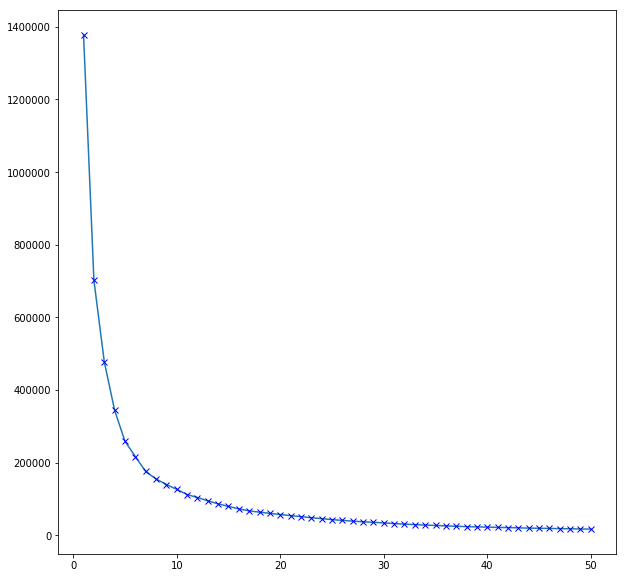

In [18]:
fig = plt.figure(figsize=(10,10))
ax = plt.plot(ks, k_inertia)
ax2 = plt.plot(ks, k_inertia, 'bx')

Как подобрать оптимальное значение? Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

Для начала считаем сами изменения

$${inertia_{k+1}-inertia_{k}}$$

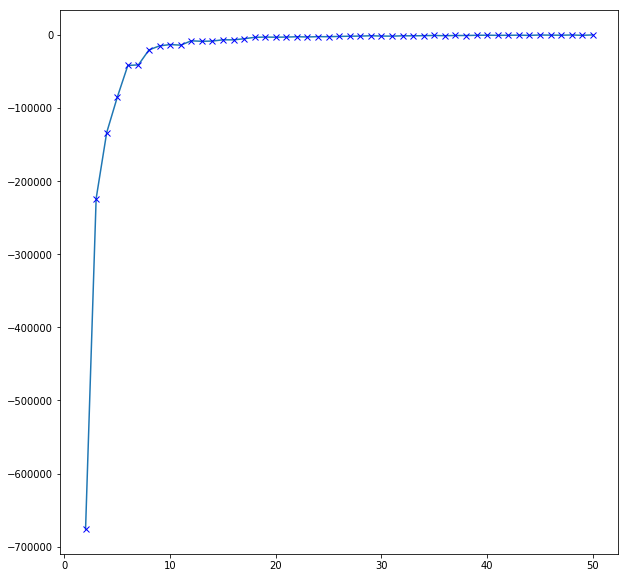

In [19]:
diff = np.diff(k_inertia)

fig = plt.figure(figsize=(10,10))
ax = plt.plot(ks[1:], diff)
ax_2 = plt.plot(ks[1:], diff, 'bx')

Теперь можно найти оптимальное число кластеров по этой формуле:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [20]:
diff_r = diff[1:] / diff[:-1]

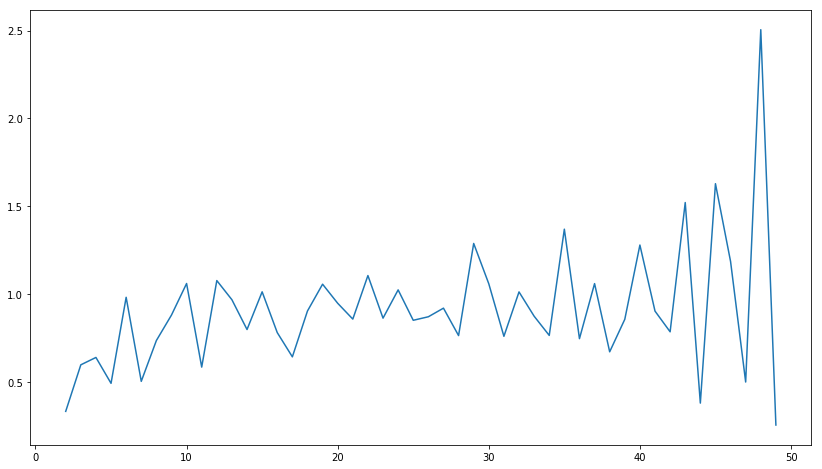

In [21]:
fig = plt.figure(figsize=(14, 8))
ax = plt.plot(ks[1:-1], diff_r)

Локальный минимум уже при 2-х кластерах, что очень мало для разделения города на районы. В целом на кривой очень много локальных минимумов и выбрать оптимальное количество кластеров затруднительно. <br>
Попробуем апроксимировать кривую полиномом 3-й степени и взять за оптимальное количество кластеров точку его перегиба.

In [22]:
# коэффициенты полинома
poly_coef = np.polyfit(ks[1:-1], diff_r, 3)
# полиномом 3-й степени
poly = np.poly1d(poly_coef)
poly

poly1d([ 2.76885115e-05, -2.31822314e-03,  6.35844641e-02,  3.74189683e-01])

In [23]:
# вторая производная от полинома
sec_derivative = np.polyder(poly, 2)
sec_derivative

poly1d([ 0.00016613, -0.00463645])

In [24]:
-sec_derivative[0]/sec_derivative[1]

27.908363606144047

In [25]:
k_opt = int(np.round(-sec_derivative[0]/sec_derivative[1]))
k_opt

28

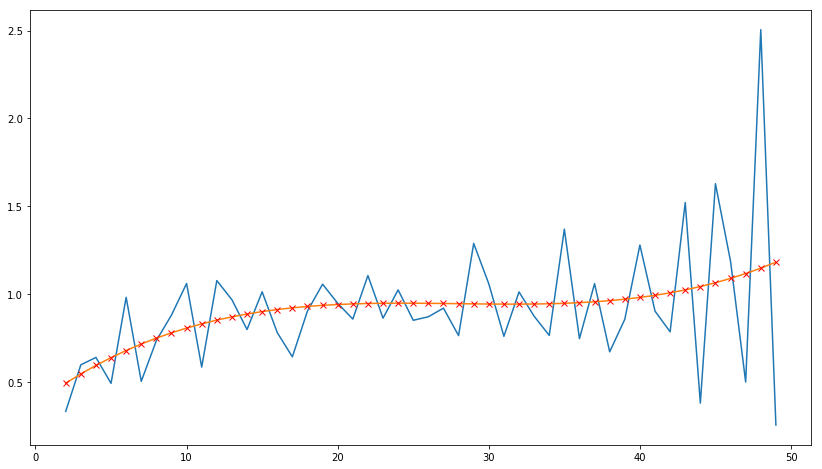

In [26]:
fig = plt.figure(figsize=(14,8))
ax = plt.plot(ks[1:-1], diff_r)
ax2 = plt.plot(ks[1:-1], poly(ks[1:-1]))
ax3 = plt.plot(ks[1:-1], poly(ks[1:-1]), 'rx')

In [27]:
clf_kmeans = KMeans(n_clusters=k_opt, n_init=50, n_jobs=-1)
clusters = clf_kmeans.fit_predict(X[['x_km', 'y_km']])
centers = clf_kmeans.cluster_centers_

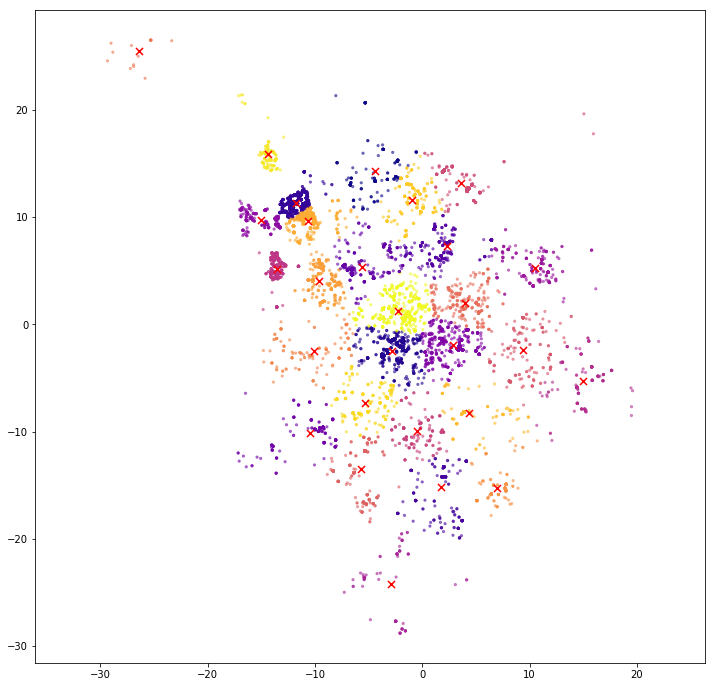

In [28]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X['x_km'], y=X['y_km'], c=clusters, s=5, cmap='plasma', alpha=0.5)
ax_2 = plt.scatter(centers[:, 0], centers[:, 1], s=50, c='r', marker='x')
_ = plt.axis('equal')

* аналогично исследовать скопления голосов за и против отдельно

In [29]:
X_pos_vote = X[X['comment_class']==1][['x_km', 'y_km']]
X_neg_vote = X[X['comment_class']==-1][['x_km', 'y_km']]

### Голоса 'за'

In [30]:
# подберем оптимальное количество кластеров для KMeans
np.random.seed(1)
k_inertia = []

for k in ks:
    clf_kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    clusters_kmeans = clf_kmeans.fit_predict(X_pos_vote)
    k_inertia.append(clf_kmeans.inertia_)

diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]

In [31]:
# коэффициенты полинома
poly_coef = np.polyfit(ks[1:-1], diff_r, 3)
# полиномом 3-й степени
poly = np.poly1d(poly_coef)
poly

poly1d([ 7.30160578e-04, -4.71294551e-02,  8.38319900e-01, -2.69894410e+00])

In [32]:
# вторая производная от полинома
sec_derivative = np.polyder(poly, 2)
sec_derivative

poly1d([ 0.00438096, -0.09425891])

In [33]:
-sec_derivative[0]/sec_derivative[1]

21.515566375157572

In [34]:
k_opt = int(np.round(-sec_derivative[0]/sec_derivative[1]))
k_opt

22

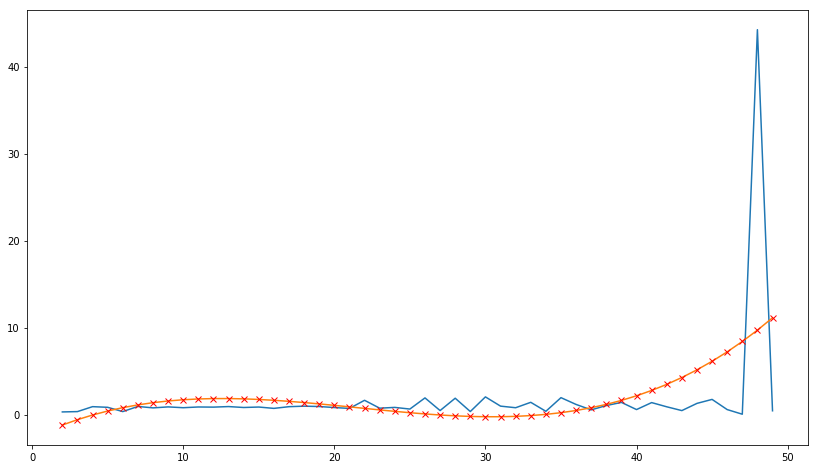

In [35]:
fig = plt.figure(figsize=(14,8))
ax = plt.plot(ks[1:-1], diff_r)
ax2 = plt.plot(ks[1:-1], poly(ks[1:-1]))
ax3 = plt.plot(ks[1:-1], poly(ks[1:-1]), 'rx')

In [36]:
clf_kmeans = KMeans(n_clusters=k_opt, n_init=50, n_jobs=-1)
clusters_pos = clf_kmeans.fit_predict(X_pos_vote)
centers_pos = clf_kmeans.cluster_centers_

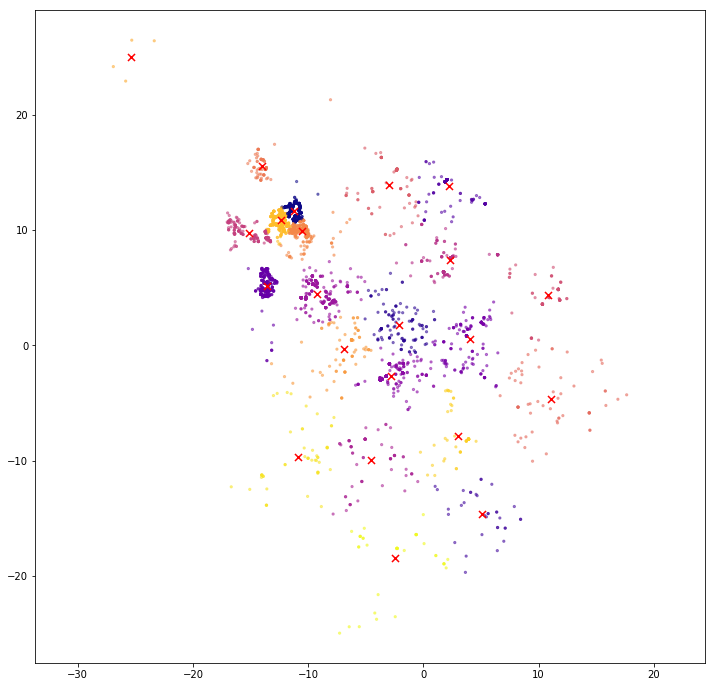

In [37]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X_pos_vote['x_km'], y=X_pos_vote['y_km'], c=clusters_pos, s=5, cmap='plasma', alpha=0.5)
ax_2 = plt.scatter(centers_pos[:, 0], centers_pos[:, 1], s=50, c='r', marker='x')
_ = plt.axis('equal')

### Голоса 'против'

In [38]:
# подберем оптимальное количество кластеров для KMeans
np.random.seed(1)
k_inertia = []

for k in ks:
    clf_kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    clusters_kmeans = clf_kmeans.fit_predict(X_neg_vote)
    k_inertia.append(clf_kmeans.inertia_)

diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]

In [39]:
# коэффициенты полинома
poly_coef = np.polyfit(ks[1:-1], diff_r, 3)
# полиномом 3-й степени
poly = np.poly1d(poly_coef)
poly

poly1d([ 1.22410801e-04, -8.03550777e-03,  1.58219161e-01,  2.08694657e-02])

In [40]:
# вторая производная от полинома
sec_derivative = np.polyder(poly, 2)
sec_derivative

poly1d([ 0.00073446, -0.01607102])

In [41]:
-sec_derivative[0]/sec_derivative[1]

21.881260177362222

In [42]:
k_opt = int(np.round(-sec_derivative[0]/sec_derivative[1]))
k_opt

22

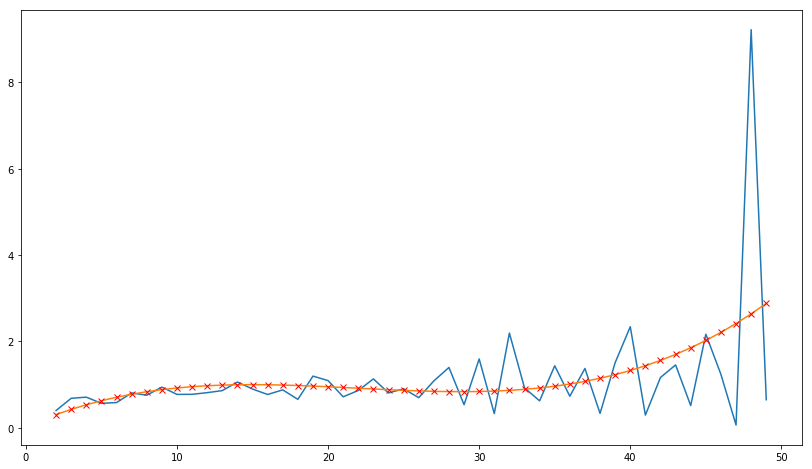

In [43]:
fig = plt.figure(figsize=(14,8))
ax = plt.plot(ks[1:-1], diff_r)
ax2 = plt.plot(ks[1:-1], poly(ks[1:-1]))
ax3 = plt.plot(ks[1:-1], poly(ks[1:-1]), 'rx')

In [44]:
clf_kmeans = KMeans(n_clusters=k_opt, n_init=50, n_jobs=-1)
clusters_neg = clf_kmeans.fit_predict(X_neg_vote)
centers_neg = clf_kmeans.cluster_centers_

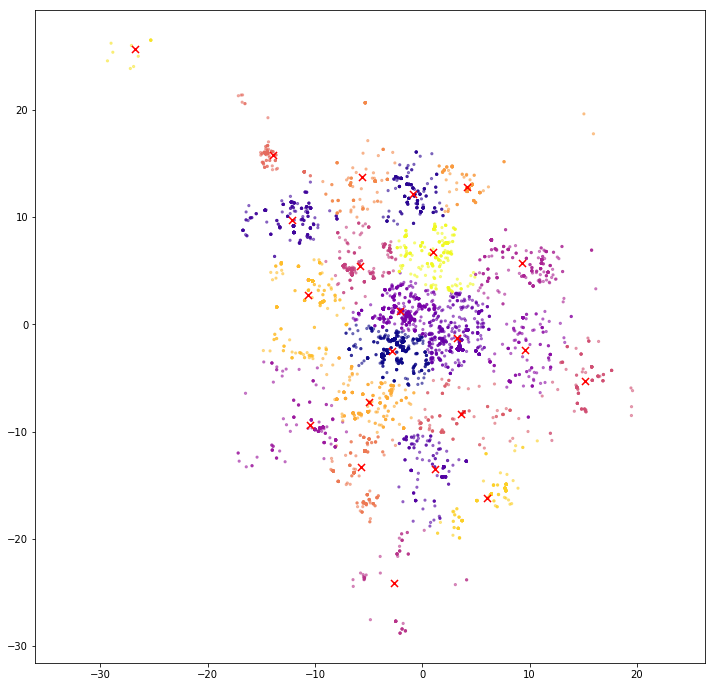

In [45]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X_neg_vote['x_km'], y=X_neg_vote['y_km'], c=clusters_neg, s=5, cmap='plasma', alpha=0.5)
ax_2 = plt.scatter(centers_neg[:, 0], centers_neg[:, 1], s=50, c='r', marker='x')
_ = plt.axis('equal')

Сравним, полученные центры на одной карте.

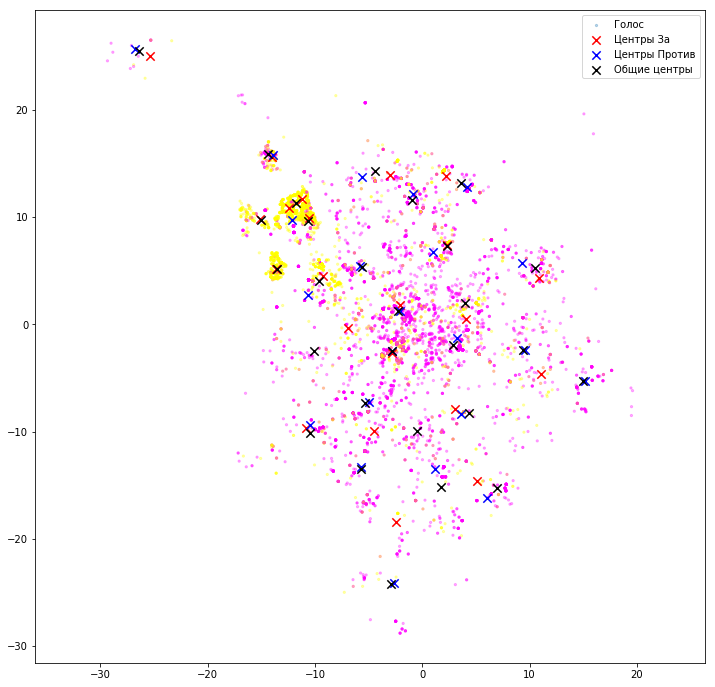

In [46]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X['x_km'], y=X['y_km'], c=X['comment_class'], cmap='spring', s=5, alpha=0.3, label='Голос')
ax_2 = plt.scatter(centers_pos[:, 0], centers_pos[:, 1], s=70, c='r', marker='x', label='Центры За')
ax_3 = plt.scatter(centers_neg[:, 0], centers_neg[:, 1], s=70, c='b', marker='x', label='Центры Против')
ax_4 = plt.scatter(centers[:, 0], centers[:, 1], s=70, c='k', marker='x', label='Общие центры')
_ = plt.axis('equal')
_ = plt.legend()

* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*

In [47]:
from sklearn.cluster import DBSCAN

In [49]:
clt_dbscan = DBSCAN(eps=0.5, min_samples=20)
clusters_active = clt_dbscan.fit_predict(X[['x_km', 'y_km']])

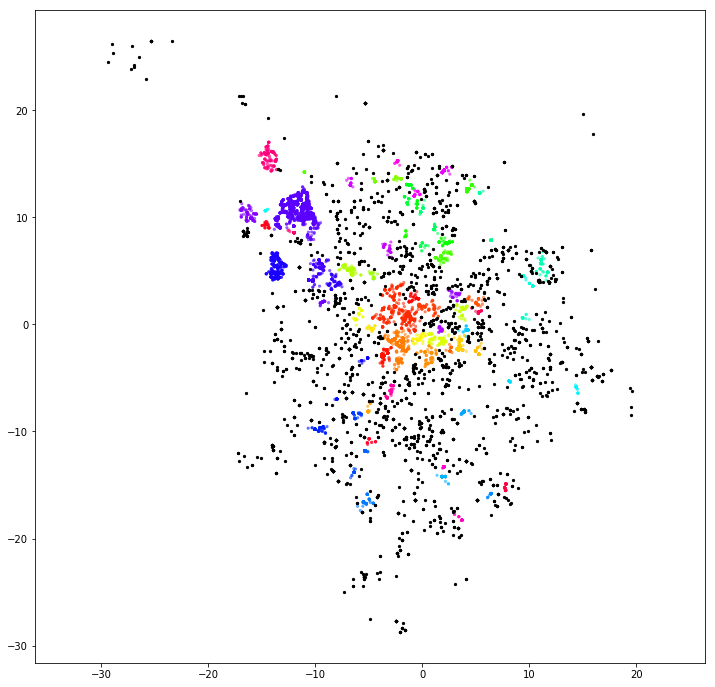

In [50]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X[clusters_active!=-1]['x_km'], y=X[clusters_active!=-1]['y_km'], 
                 c=clusters_active[clusters_active!=-1], s=5, cmap='hsv', alpha=0.5)
# черные точки - неактивно голосовавшие районы.
ax_2 = plt.scatter(x=X[clusters_active==-1]['x_km'], y=X[clusters_active==-1]['y_km'], s=5, c='k')
_ = plt.axis('equal')

Активно голосовавшие районы

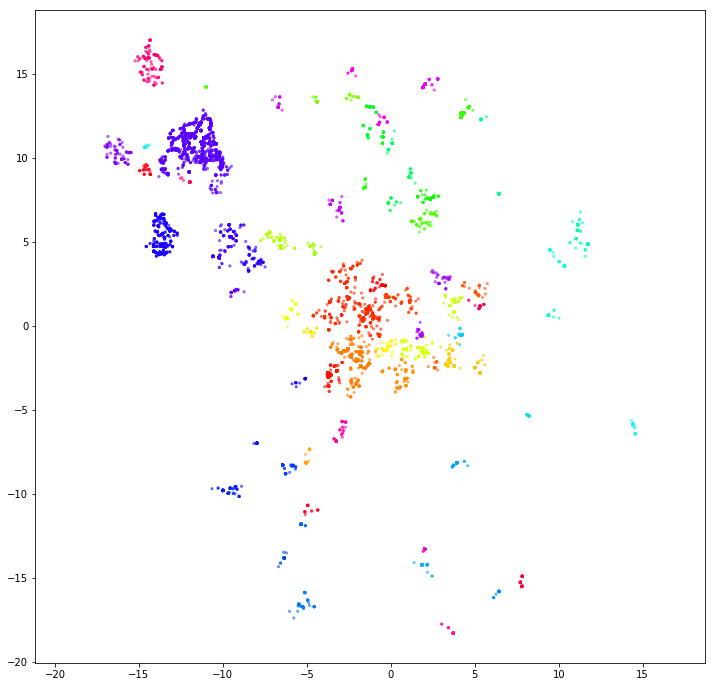

In [51]:
fig = plt.figure(figsize=(12,12))
ax = plt.scatter(x=X[clusters_active!=-1]['x_km'], y=X[clusters_active!=-1]['y_km'], 
                 c=clusters_active[clusters_active!=-1], s=5, cmap='hsv', alpha=0.5)
_ = plt.axis('equal')

Распределение голосов на карте google maps

In [76]:
df['active'] = clusters_active

In [77]:
df['active'] = df['active'].where(df['active']== -1, 1)
df['active'] = df['active'].where(df['active']!=-1, 0)

In [67]:
import gmaps

In [69]:
with open('API_key.txt') as f:
    api_key = f.readline().strip()

In [70]:
gmaps.configure(api_key=api_key)

In [80]:
locations = df[df['active'] == 1][['y', 'x']] 

In [82]:
df.head(1)

,x,y,comment_class,multiplier,comment,x_km,y_km,active
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...,-0.340587,2.409661,1


In [83]:
heatmap_layer = gmaps.heatmap_layer(locations)
heatmap_layer.max_intensity = 70
heatmap_layer.point_radius = 8

figure_layout = {
    'width': '650px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px'
}

In [84]:
# активные районы
fig = gmaps.figure(layout=figure_layout)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='1px', width='650px'))